In [2]:
import pandas as pd
import json
import numpy as np

import importlib
import nlp_pos
nlp_pos = importlib.reload(nlp_pos)

#nltk.download_gui()

In [3]:
reviews = []
with open('reviewSelected100.json','r') as json_file:
    for line in json_file:
        reviews.append(json.loads(line))

reviews_df = pd.DataFrame(reviews)

In [6]:
nlp_pos = importlib.reload(nlp_pos)
from nlp_pos import *
import spacy
import wordcloud
import matplotlib.pyplot as plt
from nltk import Counter
from nltk import FreqDist

nlp = spacy.load("en_core_web_sm")


def analyse_review(review_text:str, parser:AdjectivePhraseParser=None):

    AP = parser or AdjectivePhraseParser()
    sens = clean_split_sentences(review_text)

    phrases = []
    subtrees = []
    noun_adj_pairs = []
    for sen in sens:
        tags = [(t.lemma_, t.pos_) if t.pos_ == 'NOUN' else (t.text,t.pos_) for t in nlp(sen)  ]
        adj_phrases, phrase_tree, noun_adj_pair = AP.get_adj_phrases(tags)
        phrases += adj_phrases
        subtrees += phrase_tree
        noun_adj_pairs +=noun_adj_pair
    
    return phrases, subtrees, noun_adj_pairs

def analyse_business(business_id:str):
    business_df = reviews_df[ reviews_df['business_id'] == business_id ]
    business_df = business_df.reset_index(drop=True)

    all_phrases = []
    all_subtrees = []
    all_noun_adj_pair = []
    for text in business_df['text']:
        ap_phrases, trees, noun_adj_pair = analyse_review(text)
        all_phrases += ap_phrases
        all_subtrees += trees
        all_noun_adj_pair += noun_adj_pair
    return all_phrases, all_subtrees, all_noun_adj_pair

def get_business_avg_stars(business_id:str):
        business_df = reviews_df[ reviews_df['business_id'] == business_id ]
        return np.mean(business_df['stars'].to_numpy())


def list_to_str(str_list:list):
    all_phrase_str = ''
    for s in str_list:
        all_phrase_str+=s+' '
    return all_phrase_str

def show_wordcloud(text:str):
    wc = wordcloud.WordCloud().generate(text)
    plt.imshow(wc)
    plt.show()

def most_frequent_word_with_label(label:str, text:str ):
    from nltk import FreqDist
    from spacy import nlp
    
    words = [token.text for token in nlp(text) if token.pos_ == 'ADJ']
    fd = FreqDist(words)
    return fd.most_common()


def perform_part_3(business_id:str):
    print(random_id)
    adj_phrases, phrase_trees, noun_adj_pairs = analyse_business(random_id)

    phrase_str = list_to_str(adj_phrases)
    print("Most common adjective phrases\n",Counter(adj_phrases).most_common()[:20])

    adjs= [ p[1] for p in noun_adj_pairs]
    adj_counts = Counter(adjs)
    print("Most common adjectives:\n",adj_counts.most_common()[:20])

    show_wordcloud(phrase_str)


oICXzFAaUMrYGzjRWmkw4Q
Most common adjective phrases
 [('vietnamese restaurant', 12), ('vietnamese food', 10), ('imperial roll', 5), ('fresh roll', 5), ('extra noodle', 4), ('other review', 4), ('vietnamese coffee', 4), ('other place', 4), ('vietnamese friend', 3), ('only thing', 3), ('sour soup', 3), ('favourite place', 3), ('vietnamese place', 3), ('complimentary tea', 2), ('extra meat', 2), ('good portion', 2), ('am vietnamese', 2), ('favourite spot', 2), ('other dish', 2), ('huge mess', 2)]
Most common adjectives:
 [('vietnamese', 51), ('good', 30), ('other', 23), ('fresh', 22), ('extra', 19), ('great', 17), ('best', 12), ('huge', 9), ('small', 9), ('few', 8), ('asian', 8), ('little', 8), ('first', 7), ('amazing', 7), ('many', 6), ('quick', 6), ('favourite', 6), ('whole', 6), ('only', 6), ('special', 6)]


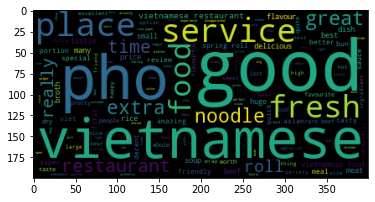

In [7]:
#random_id = reviews_df['business_id'].sample(1).item()
random_id = 'oICXzFAaUMrYGzjRWmkw4Q'
perform_part_3(random_id)


c1_adyjYG6JEa1PZAXMOBg
Most common adjective phrases
 [('indian food', 18), ('indian restaurant', 12), ('mutter paneer', 5), ('indian dish', 4), ('first experience', 4), ('other place', 4), ('first time', 4), ('great food', 4), ('indian buffet', 4), ('last night', 3), ('indian place', 3), ('first visit', 3), ('delicious butter chicken', 3), ('was huge', 3), ('devil chicken', 3), ('second time', 3), ('is pretty good', 2), ('last time', 2), ('is good', 2), ('was nice', 2)]
Most common adjectives:
 [('indian', 62), ('good', 26), ('great', 24), ('other', 16), ('nice', 14), ('first', 14), ('delicious', 13), ('spicy', 10), ('small', 9), ('second', 8), ('last', 7), ('more', 7), ('excellent', 7), ('friendly', 7), ('better', 7), ('worth', 6), ('cold', 5), ('non', 5), ('same', 5), ('huge', 5)]


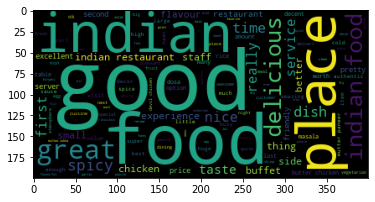

In [8]:
#random_id = reviews_df['business_id'].sample(1).item()
random_id = 'c1_adyjYG6JEa1PZAXMOBg'
perform_part_3(random_id)



j7HO1YeMQGYo3KibMXZ5vg
Most common adjective phrases
 [('hawaiian food', 14), ('loco moco', 10), ('hawaiian place', 8), ('good food', 6), ('short rib', 6), ('was good', 6), ('hawaiian restaurant', 6), ('local food', 6), ('hawaiian plate', 6), ('first time', 5), ('white rice', 5), ('other place', 5), ('teriyaki beef', 5), ('little bit', 4), ('poor boy', 4), ('juicy burger', 4), ('next time', 4), ('am sure', 3), ('green onion', 3), ('portuguese bean soup', 3)]
Most common adjectives:
 [('hawaiian', 54), ('good', 41), ('other', 23), ('local', 19), ('great', 17), ('little', 16), ('few', 14), ('teriyaki', 14), ('loco', 12), ('best', 11), ('huge', 11), ('juicy', 11), ('nice', 11), ('first', 10), ('long', 10), ('next', 10), ('big', 10), ('only', 9), ('short', 9), ('small', 9)]


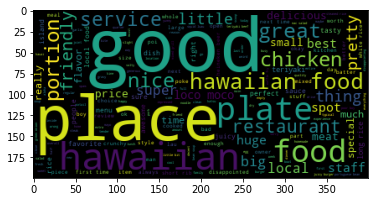

In [9]:
#random_id = reviews_df['business_id'].sample(1).item()
random_id = 'j7HO1YeMQGYo3KibMXZ5vg'
perform_part_3(random_id)
